In [3]:
import spacy 
import gzip
import re 
import pandas as pd
from spacy.lang.en import English
from collections import Counter
from itertools import chain
import ahocorasick
import ast
# from analysis.occ_frequency.analyze_m_data import get_occupations_list_en, get_occupations_list
from spacy.lang.de import German
from spacy.lang.it import Italian
from spacy.lang.es import Spanish 
import matplotlib.pyplot as plt
import itertools
from collections import Counter
from operator import itemgetter

In [2]:
filename = "/mount/studenten/projects/caulfiea/cross-verified-database.csv.gz"
csvFilename = gzip.open(filename, 'rb')
df = pd.read_csv(csvFilename, encoding='latin-1')
print(df.head(10))
print(df.columns)

  wikidata_code   birth   death  updated_death_date approx_birth approx_death  \
0      Q1000002  1932.0  1990.0                 NaN          NaN          NaN   
1      Q1000005  1860.0  1927.0                 NaN          NaN          NaN   
2      Q1000006  1971.0     NaN                 NaN          NaN          NaN   
3      Q1000015  1983.0     NaN                 NaN          NaN          NaN   
4      Q1000023  1912.0  1977.0                 NaN          NaN          NaN   
5      Q1000026  1928.0  2016.0                 NaN          NaN          NaN   
6      Q1000034  1818.0  1894.0                 NaN          NaN          NaN   
7      Q1000044  1907.0  1980.0                 NaN          NaN          NaN   
8      Q1000045  1915.0  1987.0                 NaN          NaN        circa   
9      Q1000048  1891.0  1962.0                 NaN          NaN          NaN   

   birth_min  birth_max  death_min  death_max  ... area2_of_rattachment  \
0     1932.0     1932.0     1990.

In [3]:
italian_female_df = pd.read_csv('/mount/arbeitsdaten/studenten2/caulfiea/masters_thesis/sets_for_analysis/it/it_female_occ_all.csv', encoding="utf-8")

In [4]:
it_female_codes = italian_female_df['wikidata_code'].to_list()
df2 = df.loc[df['wikidata_code'].isin(it_female_codes)]
print(df2.shape[0])

7852


In [5]:
notability_scores = df2[['wikidata_code','number_wiki_editions','sum_visib_ln_5criteria']]
result = pd.merge(italian_female_df, notability_scores, on='wikidata_code')
print(result.head())

   Unnamed: 0 wikidata_code               title  \
0           0     Q10292875  valentina baldelli   
1           1     Q10292941          ada puliti   
2           2     Q10293226        lella artesi   
3           3     Q10293303      erika striulli   
4           4     Q10293464       cinzia arioli   

                                               intro  gender  \
0  valentina baldelli (gualdo tadino, 30 gennaio ...  female   
1  ada puliti (lucca, 4 luglio 1985) è un'ex cest...  female   
2  mirella artesi, detta lella (bologna, 24 febbr...  female   
3  erika striulli (venezia, 20 ottobre 1990) è un...  female   
4  cinzia arioli (magenta, 7 febbraio 1984) è una...  female   

             occupations                                     first_sentence  \
0  ['basketball player']  Valentina Baldelli (Gualdo Tadino, 30 gennaio ...   
1  ['basketball player']  Ada Puliti (Lucca, 4 luglio 1985) è un'ex cest...   
2           ['director']  Mirella Artesi, detta Lella (Bologna, 24 febb

In [13]:
italian_other_df = pd.read_csv('/mount/arbeitsdaten/studenten2/caulfiea/masters_thesis/sets_for_analysis/redo/it_other_occ.csv', encoding="utf-8")

In [14]:
it_other_codes = italian_other_df['wikidata_code'].to_list()
df2 = df.loc[df['wikidata_code'].isin(it_other_codes)]
print(df2.shape[0])

82


In [15]:
notability_scores = df2[['wikidata_code','number_wiki_editions','sum_visib_ln_5criteria']]
result = pd.merge(italian_other_df, notability_scores, on='wikidata_code')
print(result.head())

   Unnamed: 0 wikidata_code           title  \
0           0      Q1091285  holly woodlawn   
1           1      Q1140735       lili elbe   
2           3      Q1262889          anohni   
3           4       Q127362      chief keef   
4           5      Q1276110   jackie curtis   

                                               intro   gender  \
0  holly woodlawn (juana díaz, 26 ottobre 1946 – ...  Unknown   
1  lili ilse elvener (vejle, 28 dicembre 1882 – d...  Unknown   
2  anohni, pseudonimo di anohni hegarty (nata ant...  Unknown   
3  chief keef (alternativamente sosa), pseudonimo...  Unknown   
4  john curtis holder, jr., meglio conosciuta com...  Unknown   

                                         occupations  \
0                             ['Unknown', 'Unknown']   
1                                        ['Unknown']   
2  ['Unknown', 'Unknown', 'Unknown', 'Unknown', '...   
3       ['Unknown', 'Unknown', 'Unknown', 'Unknown']   
4  ['Unknown', 'Unknown', 'Unknown', 'Unknown'

In [9]:
def get_avg_notability_scores(result):
    all_professions = set()
    for row in result['overlapping_occupations_sentence1']:
        for entry in row:
            all_professions.update(entry.keys())

    # Step 2: Compute average score per profession
    avg_scores = {}
    for profession in all_professions:
        def row_contains_profession(row):
            return any(profession in d for d in row)

        filtered = result[result['overlapping_occupations_sentence1'].apply(row_contains_profession)]
        
        if not filtered.empty:
            avg_scores[profession] = filtered['number_wiki_editions'].mean()
        else:
            avg_scores[profession] = None  # or np.nan if preferred

    return avg_scores

In [16]:
result['overlapping_occupations_sentence1'] = result['overlapping_occupations_sentence1'].apply(ast.literal_eval)

In [17]:
avg_scores =get_avg_notability_scores(result)

In [18]:
# print(avg_scores['medico'])
# print(avg_scores['medica'])
# print(avg_scores['presidente'])
# print(avg_scores['avvocato'])
# print(avg_scores['avvocata'])
print(avg_scores['attrice'])

12.870967741935484


In [19]:
professions_it = ["medico","medica","capitano","capitana","sindaco","sindaca","avvocato",'avvocata',"architetto","architetta","sportivo","sportiva","sottosegretario",
"sottosegretaria","allenatore","allenatrice","critico","critica","magistrato","magistrata","deputato","deputata","ministro","ministra","senatore","senatrice","dottore","dottoressa","assessore","assessora",
"carabiniere","carabiniera","deputato","deputata","direttore","direttrice"]

In [20]:
def filter_dict(pair):
    key,value = pair
    if key in professions_it:
        return True
    else:
        return False

filtered_professions = dict(filter(filter_dict, avg_scores.items()))
print(filtered_professions)

{'senatrice': np.float64(8.0), 'ministra': np.float64(20.0)}


In [12]:
def make_plot2(overlapping_occ_counts):
    # get bar chart of top 20 occupations
    ten_items = overlapping_occ_counts
    values = list(ten_items.values())
    values = [float(i) for i in values]
    values_sum = sum(values)
    print(values_sum)
    averages = [x / values_sum for x in values]
    print(averages[:10])
    plt.bar(range(len(ten_items)), values, align='center')
    plt.xticks(range(len(ten_items)), list(ten_items.keys()))
    plt.xticks(rotation=90)
    plt.title("Average Number of Wikipedia Editions of Biographies Containing Occupational Titles in Italian Female Data")

23.018181818181816
[0.04344391785150079, 0.04344391785150079, 0.04344391785150079, 0.04344391785150079, 0.04344391785150079, 0.04344391785150079, 0.04344391785150079, 0.044233807266982623, 0.04344391785150079, 0.04344391785150079]


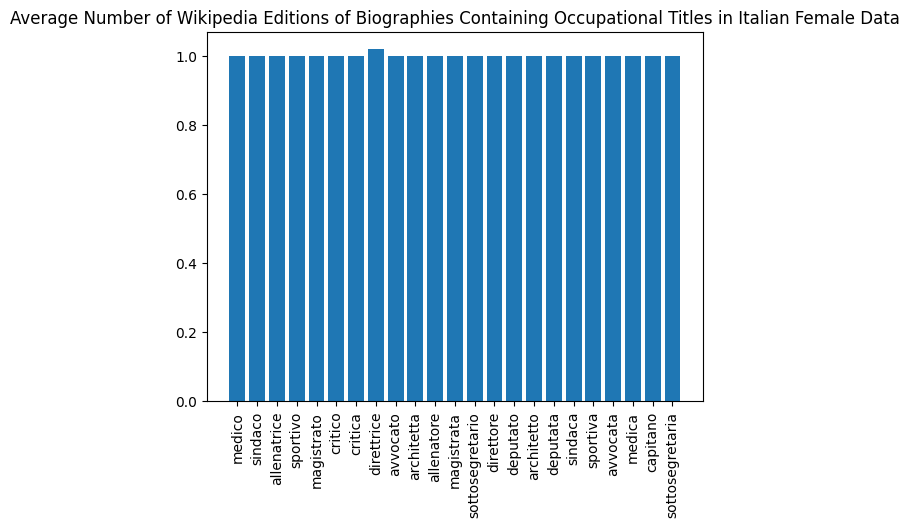

In [13]:
make_plot2(filtered_professions)